In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

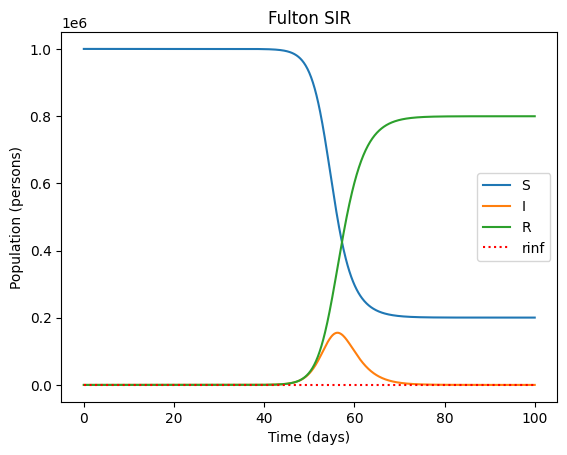

In [38]:
# Set duration grid (in days)
step = 0.1 # stepsize
t0 = 0 #initial time
tf = 100 #final time
n = int(np.ceil((tf-t0)/step)) #number of data points
ts = np.linspace(t0,tf,n+1)
step = ts[1]-ts[0]

# Introduce constraints
N = 10**6 # total population
I0 = 1/N #initial infected
R0 = 0 #initial recovered
S0 = N - I0 - R0 #initial susceptible

# Introduce parameters
beta = 1.0
gamma = 0.5

# Set initial conditions

y = np.zeros((len(ts),3))
y[0] = S0, I0, R0

rinf = np.zeros((len(ts),1))
rinf[0] = 797

# SIR Model
def model(y,t,N,beta,gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])

for i, t in enumerate(ts[:-1]):
    y[i+1] = y[i] + step*model(y[i], t, N ,beta, gamma)
    rinf[i+1] = rinf[i]
    
plt.plot(ts,y)
plt.plot(ts, rinf, 'r:')
plt.title('Fulton SIR')
plt.xlabel('Time (days)')
plt.ylabel('Population (persons)')
plt.legend(['S', 'I','R', 'rinf'])
plt.show()

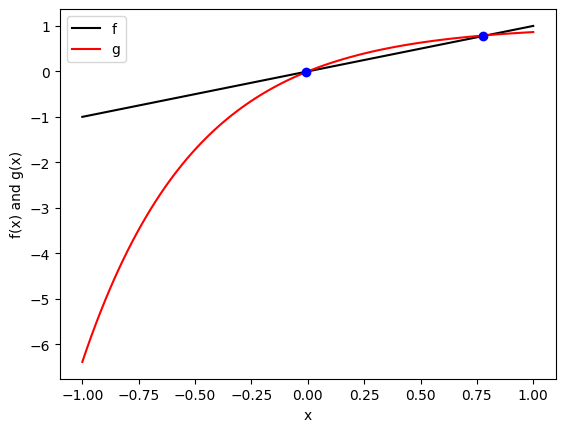

(array([-0.01010101,  0.77777778]), array([-0.01010101,  0.77777778]))

In [21]:
#Let $R_\infty$ = x and f(x) = x and g(x) = 1 - e^(-R0*x)
x = np.linspace(-1.0, 1.0, 100)
R0 = 2.0
f = x
g = 1 - np.exp(- R0 * x)
plt.plot(x,f,'k')
plt.plot(x,g,'r')
plt.legend(['f','g'])
plt.xlabel('x')
plt.ylabel('f(x) and g(x)')

# Plot point of intersection
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(x[idx], f[idx], 'bo')
plt.show()